In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
drilldf = pd.read_csv('./phaseone-drill.csv')

In [8]:
drilldf.head()

,Category Name,Unit,Price
0,Impact Drill,Piece,2
1,Impact Drill,Piece,675
2,Impact Drill,Piece,766
3,Impact Drill,Piece,900
4,Impact Drill,Piece,1000


In [11]:
units=drilldf['Unit'].unique()
units

array(['Piece', 'Piece(s)', 'pack', 'unit', 'Number', 'Unit', 'Pack',
       '1nos', 'Unit(s)', 'kit', 'Set', 'Pc_Onwards', 'ONWARDS', 'Kit'],
      dtype=object)

In [12]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Piece(s)        5
Pc_Onwards      5
1nos            1
kit             1
Unit(s)         1
Set             1
Kit             1
ONWARDS         1
Name: Unit, dtype: int64

In [13]:
npa=drilldf['Price'][1:]

In [15]:
drilldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
Category Name    247 non-null object
Unit             247 non-null object
Price            247 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [17]:
drilldf[1:].describe()

,Price
count,246.000000
mean,6596.853659
std,9554.054996
min,675.000000
25%,2115.500000
50%,3108.500000
75%,6030.000000
max,55000.000000


In [19]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

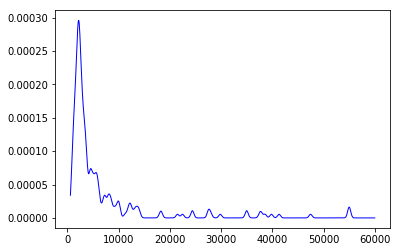

In [33]:
y_grid=np.linspace(600,60000,1000)
pdf = kde_scipy(npa, y_grid, bandwidth=300)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)

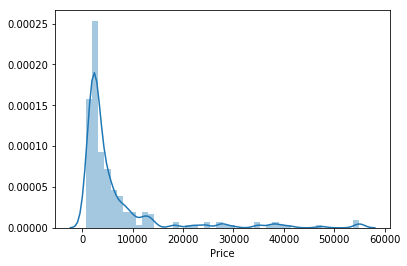

In [34]:
sns.distplot(df_train['Price'][1:]);

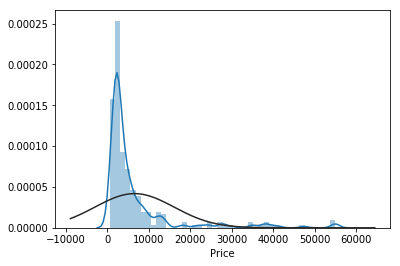

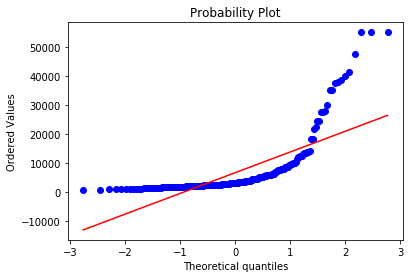

In [35]:
sns.distplot(df_train['Price'][1:], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Price'][1:], plot=plt)

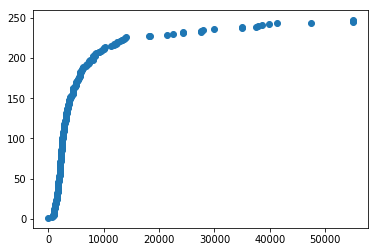

In [42]:
plt.scatter(drilldf['Price'],array);

In [41]:
array=np.arange(247)+1;array

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18